In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
df = pd.read_csv('bcw_data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [23]:
df.shape

(569, 32)

In [11]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [17]:
df = df.drop(columns=['Unnamed: 32'])

In [19]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [34]:
df_target = df.pop('diagnosis')
#help(df.pop)

In [40]:
df_target

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

# Analyse et selection de variables

Text(0.5, 1.0, 'Correlation')

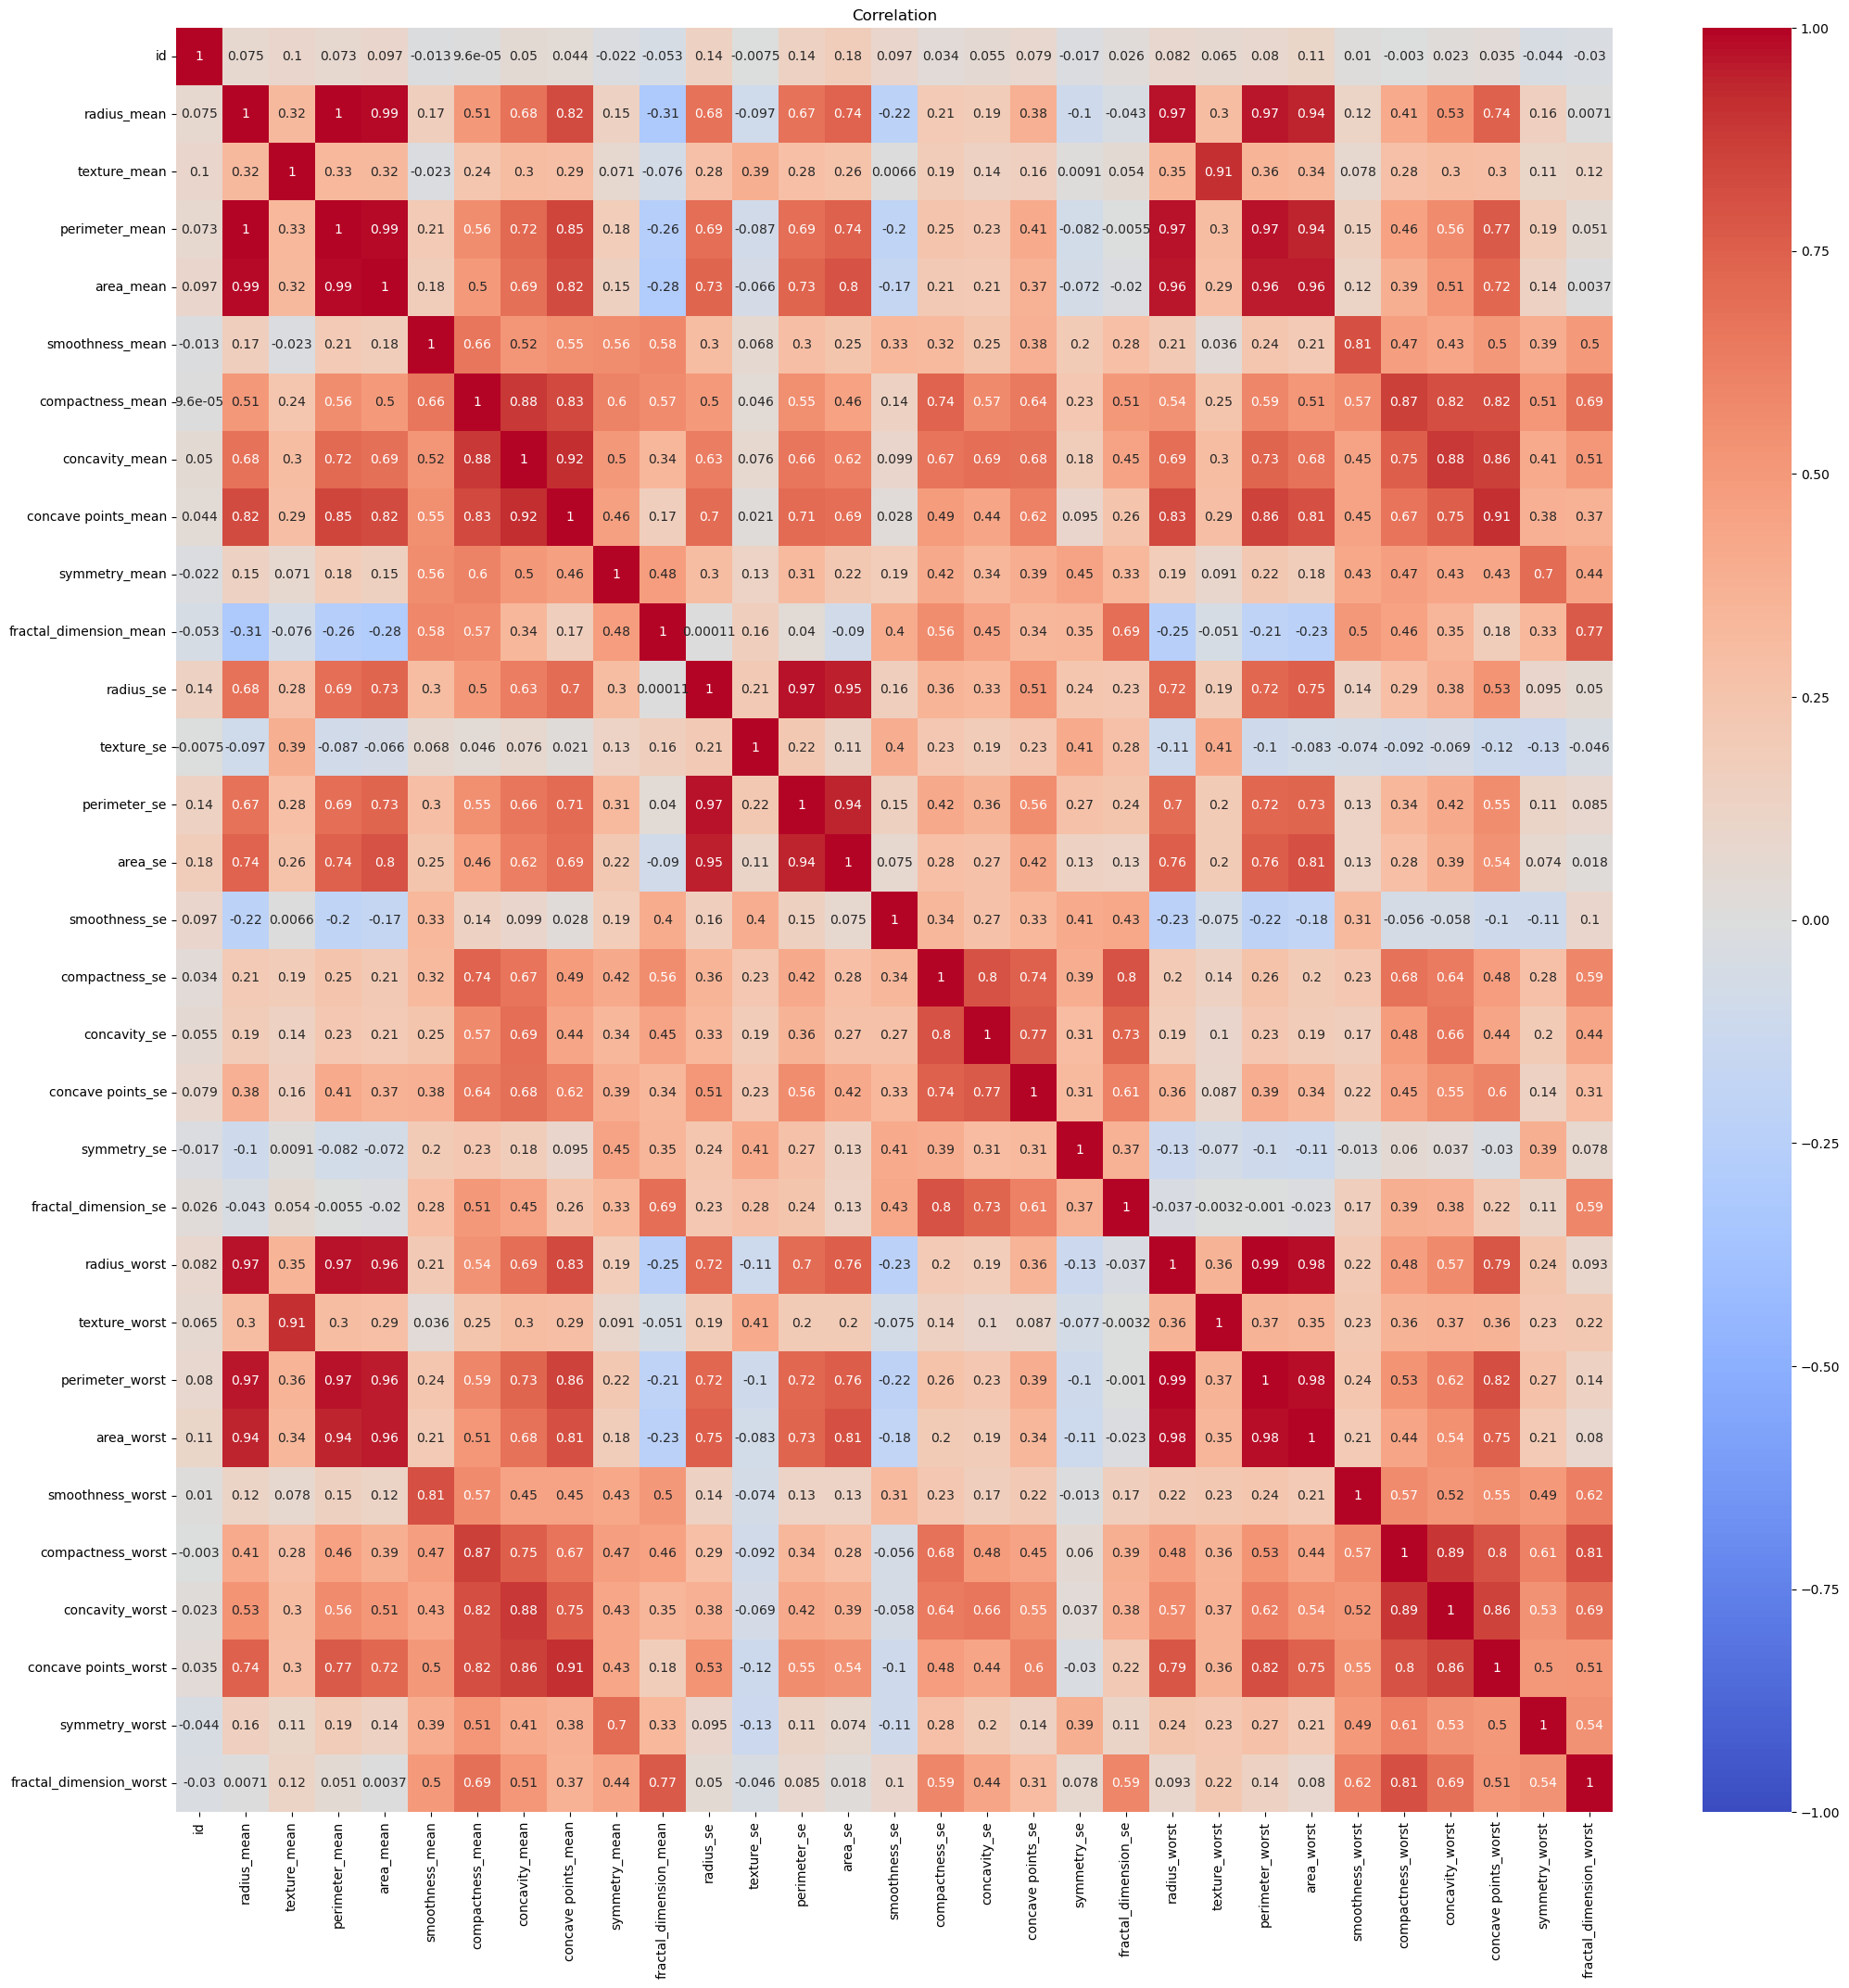

In [46]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(25,25))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title
plt.title('Correlation')

In [50]:
# Get pairs of features with correlation values
high_corr_pairs = correlation_matrix.unstack().reset_index()
high_corr_pairs.columns = ['FeatureX', 'FeatureY', 'Correlation']

# Filter for correlations > 0.9, including 1.0, but exclude self-correlations
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'] > 0.85)]
high_corr_pairs = high_corr_pairs[high_corr_pairs['FeatureX'] != high_corr_pairs['FeatureY']]

# Drop duplicate pairs (keep unique pairs like (FeatureX, FeatureY) and remove (FeatureY, FeatureX))
high_corr_pairs['Pair'] = high_corr_pairs.apply(lambda row: tuple(sorted([row['FeatureX'], row['FeatureY']])), axis=1)
high_corr_pairs = high_corr_pairs.drop_duplicates(subset='Pair').drop(columns='Pair')

# Print the result
print(high_corr_pairs)

                FeatureX              FeatureY  Correlation
34           radius_mean        perimeter_mean     0.997855
35           radius_mean             area_mean     0.987357
52           radius_mean          radius_worst     0.969539
54           radius_mean       perimeter_worst     0.965137
55           radius_mean            area_worst     0.941082
84          texture_mean         texture_worst     0.912045
97        perimeter_mean             area_mean     0.986507
101       perimeter_mean   concave points_mean     0.850977
114       perimeter_mean          radius_worst     0.969476
116       perimeter_mean       perimeter_worst     0.970387
117       perimeter_mean            area_worst     0.941550
145            area_mean          radius_worst     0.962746
147            area_mean       perimeter_worst     0.959120
148            area_mean            area_worst     0.959213
193     compactness_mean        concavity_mean     0.883121
212     compactness_mean     compactness

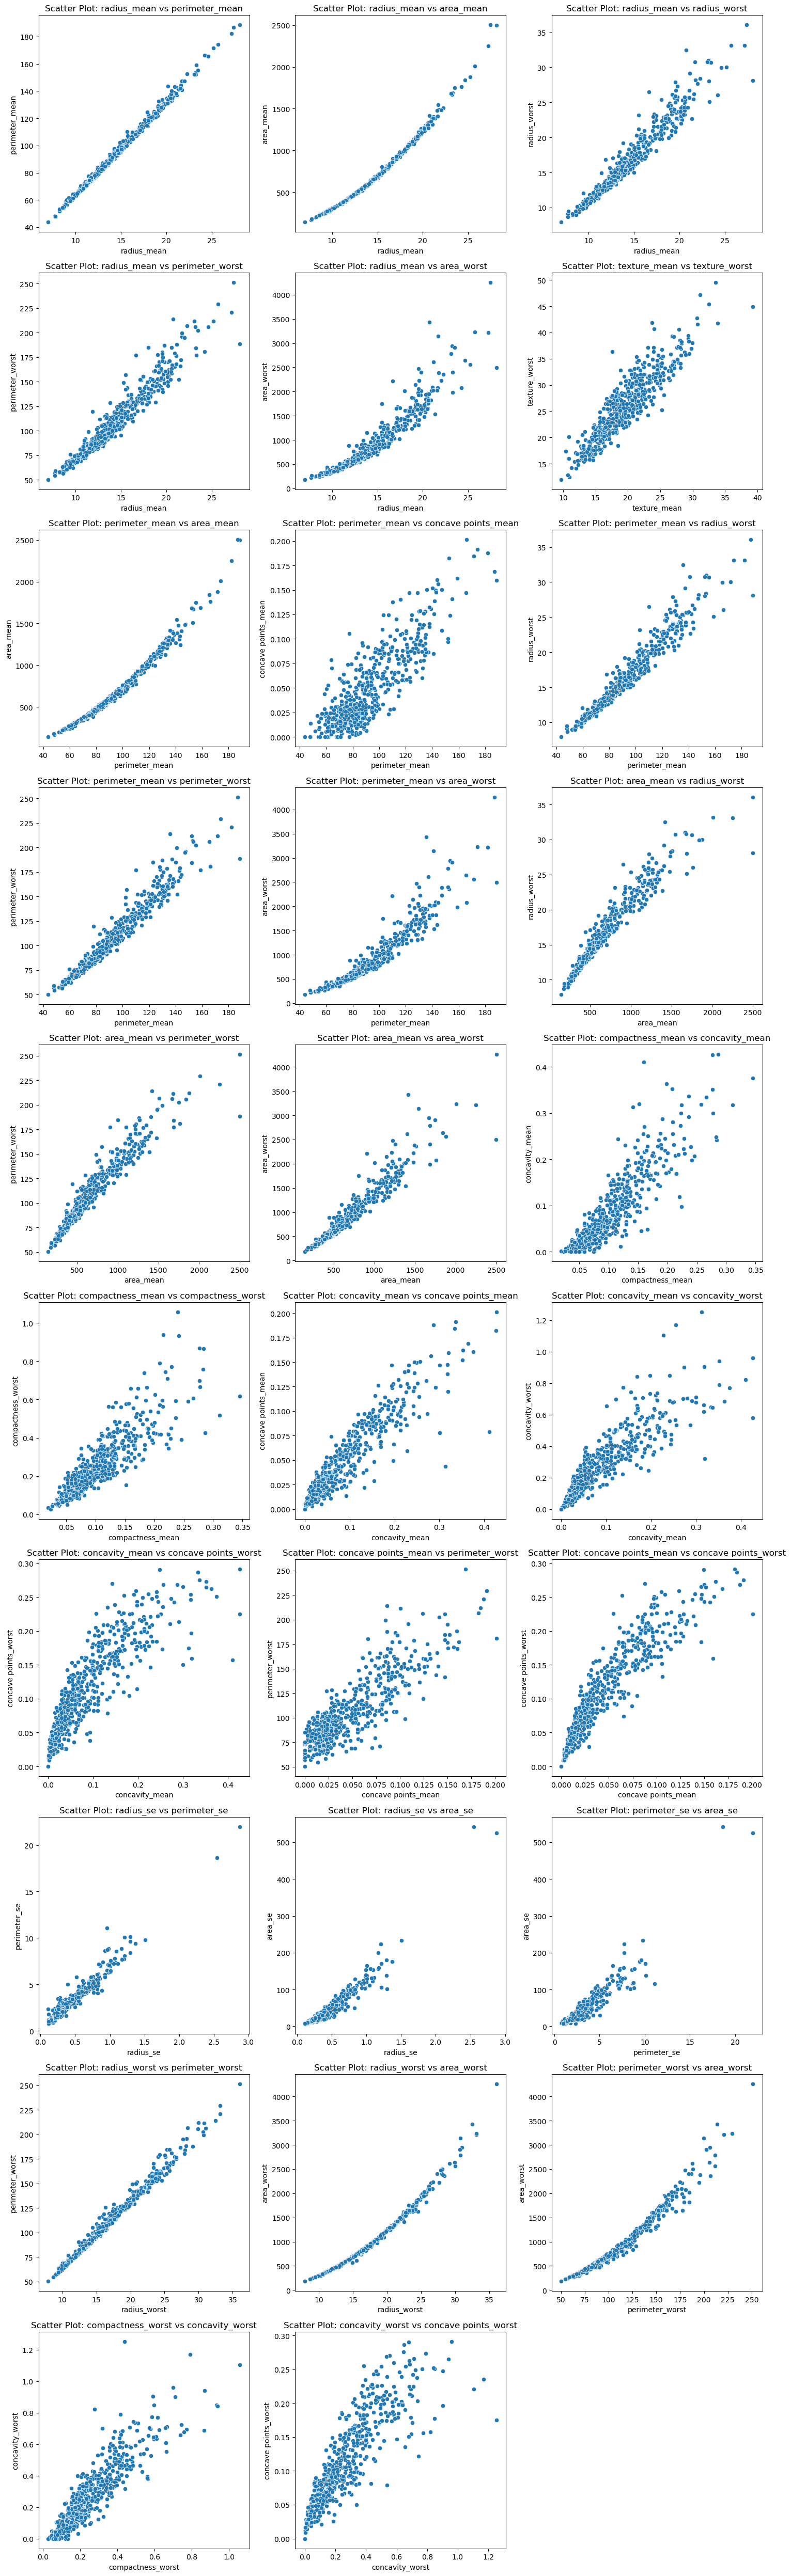

In [56]:
# Number of plots
num_plots = len(high_corr_pairs)

# Calculate the number of rows and columns for the subplots
cols = 3  # You can change this to any number of columns you prefer
rows = math.ceil(num_plots / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten to iterate easily

# Iterate over the rows of high_corr_pairs and plot each one in a subplot
for i, (_, row) in enumerate(high_corr_pairs.iterrows()):
    xx = row['FeatureX']
    yy = row['FeatureY']
    
    sns.scatterplot(data=df, x=xx, y=yy, ax=axes[i])
    axes[i].set_title(f'Scatter Plot: {xx} vs {yy}')
    axes[i].set_xlabel(xx)
    axes[i].set_ylabel(yy)

# Remove any unused subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Features selection

In [79]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
import numpy as np
from tqdm import tqdm

In [ ]:
df_target = df_target.map({'M': 1, 'B': 0})
df_target

In [63]:
rf = RandomForestClassifier(n_jobs=-1, max_depth=5)

In [117]:
boruta_selector = BorutaPy(
    rf,
    n_estimators='auto',
    random_state=1,
    verbose=2  # Mettre à 2 pour activer les messages de progression de Boruta
)

In [119]:
boruta_selector.fit(df.values, df_target.values)
    pbar.update(1)  # Met à jour la barre de progression

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	22
Tentative: 	9
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	22
Tentative: 	9
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	22
Tentative: 	9
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	22
Tentative: 	9
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	22
Tentative: 	7
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	22
Tentative: 	7
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	22
Tentative: 	7
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	22
Tentative: 	7
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	23
Tentative: 	6
Rejected: 	2
I

BorutaPy(estimator=RandomForestClassifier(max_depth=7, n_estimators=106,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x239AFF37440),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x239AFF37440, verbose=2)

In [129]:
# Récupérer les variables sélectionnées par Boruta
selected_features = df.columns[boruta_selector.support_].to_list()
print(f'On a {len(selected_features)} features avec {len(df.columns)}')
print("Caractéristiques sélectionnées par Boruta :", selected_features)

On a 23 features avec 31
Caractéristiques sélectionnées par Boruta : ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


Text(0.5, 1.0, 'Matrice de Corrélation des Caractéristiques Sélectionnées par Boruta')

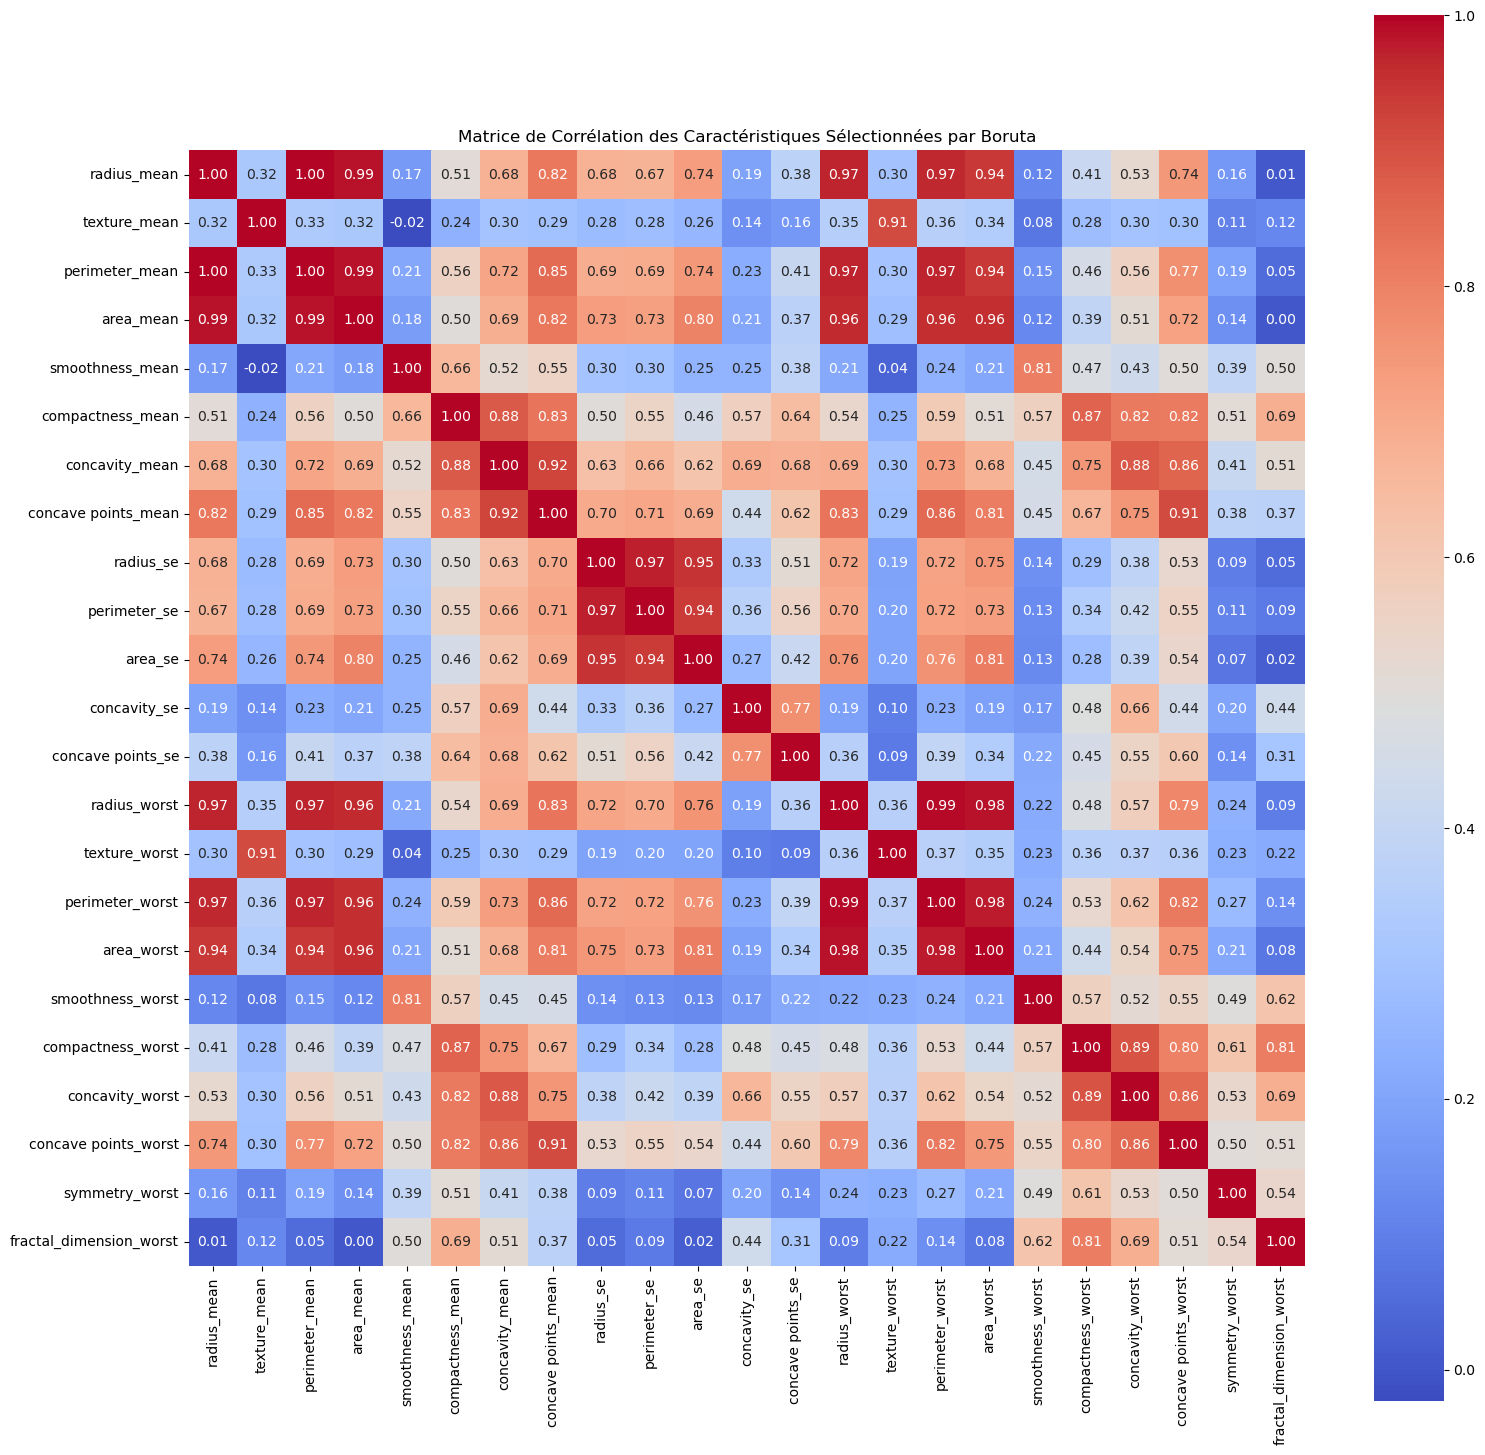

In [131]:
# Filtrer les données pour ne garder que les caractéristiques sélectionnées
selected_df = df[selected_features]

# Calculer la matrice de corrélation
correlation_matrix = selected_df.corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Matrice de Corrélation des Caractéristiques Sélectionnées par Boruta")

# Perceptron

In [134]:
class SimplePerceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialiser les poids et le biais
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Entraîner le perceptron
        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                # Calculer la prédiction
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self._activation_function(linear_output)

                # Mettre à jour les poids et le biais si la prédiction est incorrecte
                if y[idx] != y_pred:
                    update = self.learning_rate * (y[idx] - y_pred)
                    self.weights += update * x_i
                    self.bias += update

    def _activation_function(self, x):
        # Fonction d'activation : renvoie 1 si x >= 0, sinon 0
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        # Prédire les étiquettes
        linear_output = np.dot(X, self.weights) + self.bias
        return self._activation_function(linear_output)


In [136]:
# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_df, df_target, test_size=0.2, random_state=42)

In [138]:
# Initialiser et entraîner le modèle perceptron
perceptron = SimplePerceptron(learning_rate=0.01, n_iter=1000)
perceptron.fit(X_train.values, y_train.values)  # .values pour utiliser uniquement les données numériques

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prédire les étiquettes sur l'ensemble de test
y_pred = perceptron.predict(X_test.values)

# Calculer les métriques de performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Afficher les résultats
print(f"Exactitude : {accuracy:.2f}")
print(f"Précision : {precision:.2f}")
print(f"Rappel : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

Exactitude : 0.96
Précision : 0.95
Rappel : 0.93
F1-score : 0.94


In [144]:
df.iloc[0] == selected_df.iloc[0]

ValueError: Can only compare identically-labeled Series objects